In [84]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

print(tf.__version__)

2.2.0


### Import dataset.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Define class names.

In [120]:
class_names = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat',
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot'
]

### Check dataset. 

train_images.shape:  (60000, 28, 28)
train_labels      :  60000
train_labels      :  [9 0 0 ... 3 0 5]
test_images.shape :  (10000, 28, 28)
test_labels       :  10000


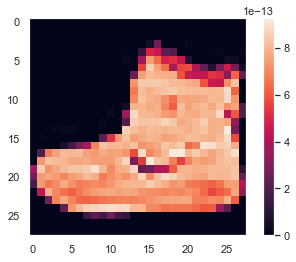

[9 0 0 ... 3 0 5]


In [131]:
print("train_images.shape: ", train_images.shape)
print("train_labels      : ", len(train_labels))
print("train_labels      : ", train_labels)
print("test_images.shape : ", test_images.shape)
print("test_labels       : ", len(test_labels))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [123]:
# Scaling image value by diviging 255. 
train_images = train_images / 255.0
test_images = test_images / 255.0

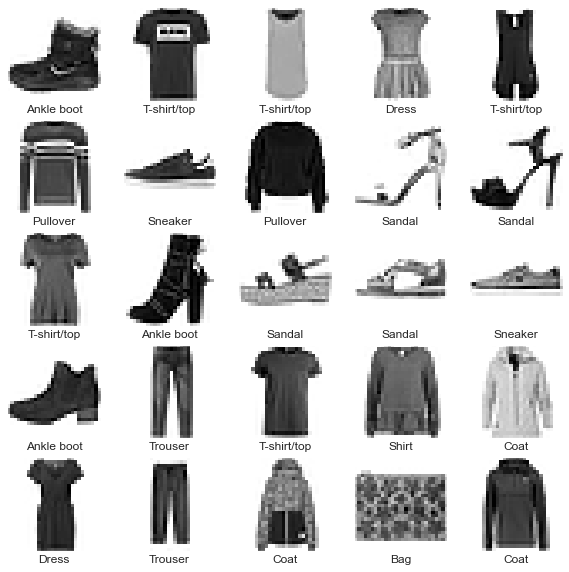

In [125]:
# Display images in training dataset. 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [126]:
# Modeling.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [127]:
# Configuration of the model. 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [134]:
# Training with train_images, train_labels. 
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0971
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0990
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0958
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0994
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0979
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0969
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0970
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.302

### Check model performance

History object contains model metrics such as accuracy and loss. Those metrics are stored as a dictionary that represents each learning phase. For example, if you set epoch = 10, history object contains 10 metrics as its learning history. 

[tensorflow: fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

,times,accuracy,loss
0,1,0.100017,2.302738
1,2,0.098150,2.302791
2,3,0.097050,2.302780
3,4,0.098567,2.302789
4,5,0.097633,2.302771
5,6,0.098400,2.302774
6,7,0.096117,2.302794
7,8,0.099017,2.302776
8,9,0.098667,2.302788
9,10,0.095500,2.302770


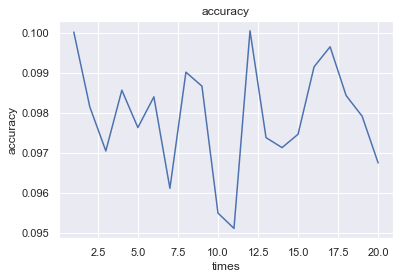

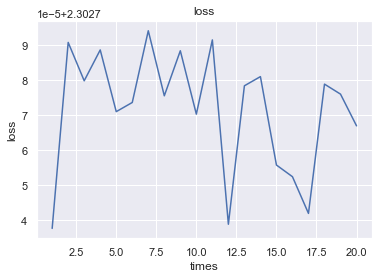

In [133]:
# Extract accuracy and loss from history object.
accuracy = history.history["accuracy"]
loss = history.history["loss"]

# Store in DataFrame for visualization. 
history_df = pd.DataFrame({
    "times": [i for i in range(1,21)],
    "accuracy": accuracy,
    "loss": loss,     
})

# Display table.
display(history_df)

# Lineplot with seaborn.
sns.set_style("darkgrid")
sns.lineplot(x="times", 
             y="accuracy", 
             data=history_df[["times", "accuracy"]]).set_title("accuracy")
plt.show()

sns.lineplot(x="times", 
             y="loss", 
             data=history_df[["times", "loss"]]).set_title("loss")
plt.show()

### evalute()

evalute() method is to evalute the performance of the model. It returns loss and metrics values of the model.

[evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [135]:
# Evaluate the model with test data. 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy: ", test_acc)
print("Test loss    : ", test_loss)

313/313 - 0s - loss: 2.3027 - accuracy: 0.1000
Test accuracy:  0.10000000149011612
Test loss    :  2.3026700019836426


### Creating prediction model. 

Creating prediction model with softmax and logits that is a function which oeperates on the unscaled output of ealier layers and on a linear scal to understand the linear units. Logits typically become an input to the softmax function. 

[logits](https://developers.google.com/machine-learning/glossary#logits)

In [136]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

### Check the prediction. 

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [137]:
print("predictions[0]    : ", predictions[0])
print("Highest Confidenct: ", np.argmax(predictions[0]))
print("test_labels[0]    : ", test_labels[0])

predictions[0]    :  [0.10230492 0.10223733 0.09990738 0.09906338 0.09976806 0.10003108
 0.09931116 0.0983085  0.10051658 0.0985516 ]
Highest Confidenct:  0
test_labels[0]    :  9


In [138]:
def plot_image(i, predictions_array, true_label, img):
    """Plot Image
    
    Arguments
    ---------
    i: int
        Index of image dataset. 
    predictions_array: list
        Prediction list extracted by predictions[i]
    true_label: list
        Test data label. 
    img: list
        Image test dataset. 
    """

    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    # Extract highest confidence value.
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    """Plot bargraph.
    
    Arguments
    ---------
    i : int
        Index
    predictions_array : list
        predictions array.
    true_label : list
        Test dataset label. 
    """
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

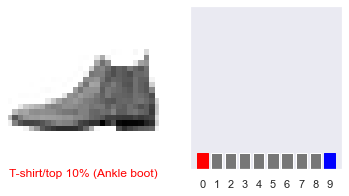

In [139]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

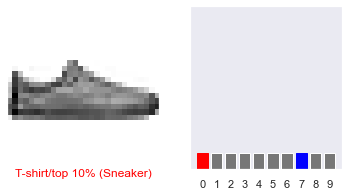

In [140]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

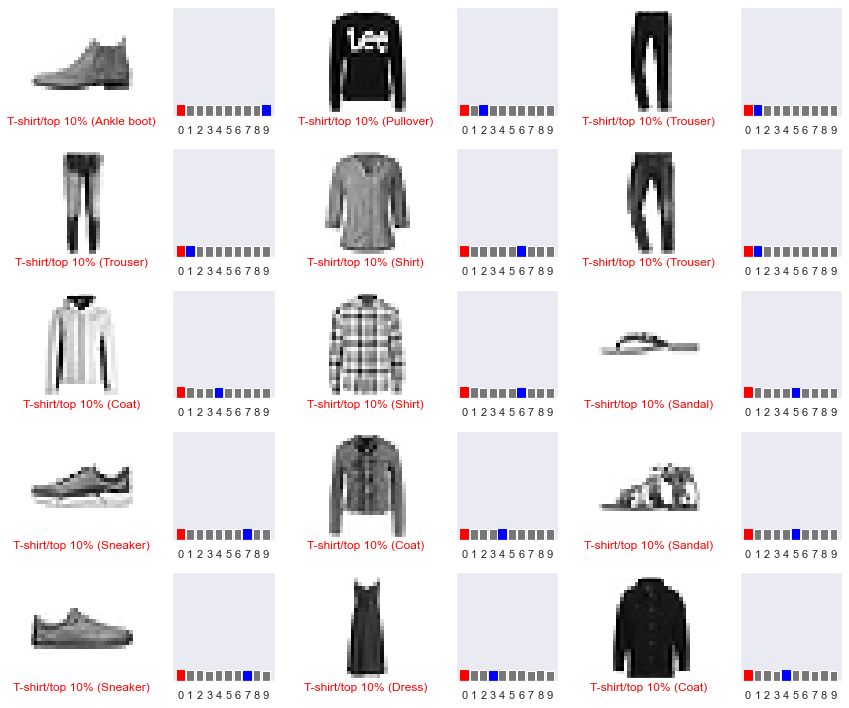

In [141]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()